# This is a the Test Simulation for MWM GG Targets

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.table import Table,vstack
from targetlib import testfield_gal,testfield_fk5,testfield_ecl
from astropy.coordinates import SkyCoord
from astropy.coordinates import Galactic,FK5,BarycentricTrueEcliptic
import astropy.units as u
%matplotlib inline

## Read in Target and Cadence Tables

In [2]:
gg_tab = Table.read('workspace/target_files/GG/mwm_galactic_1x1.csv')
gg_tab

ra,dec
float64,float64
256.34673,-89.862175
5.083719,-89.810509
127.47754599999999,-89.792671
294.04972000000004,-89.709785
119.85926699999999,-89.694496
254.016341,-89.673645
116.55820600000001,-89.66699200000001
289.81759,-89.66037800000001
316.423649,-89.650513


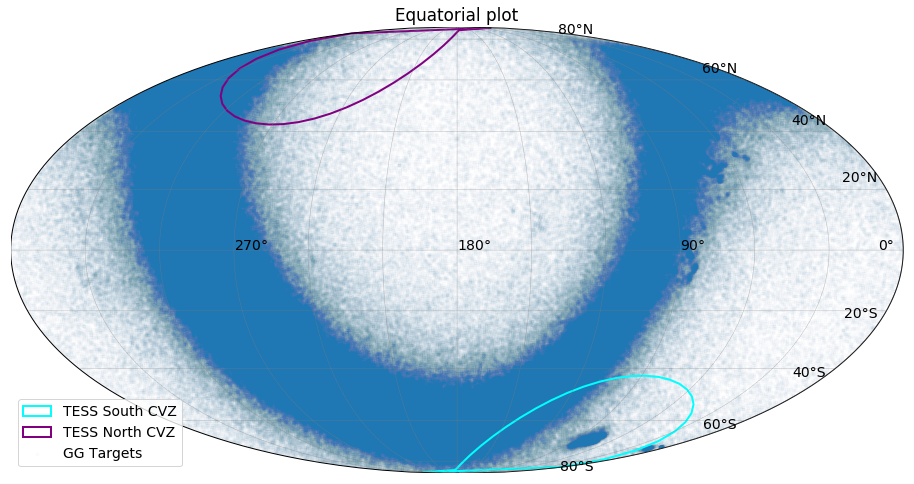

In [3]:
plt.rcParams.update({'font.size': 14})
(fig,bmap) = testfield_fk5()
#Plot GG Targets
ggx,ggy = bmap(gg_tab['ra'],gg_tab['dec'])
bmap.scatter(ggx,ggy,marker='.',label='GG Targets',alpha=0.01)
plt.title("Equatorial plot")
plt.legend()
plt.show()

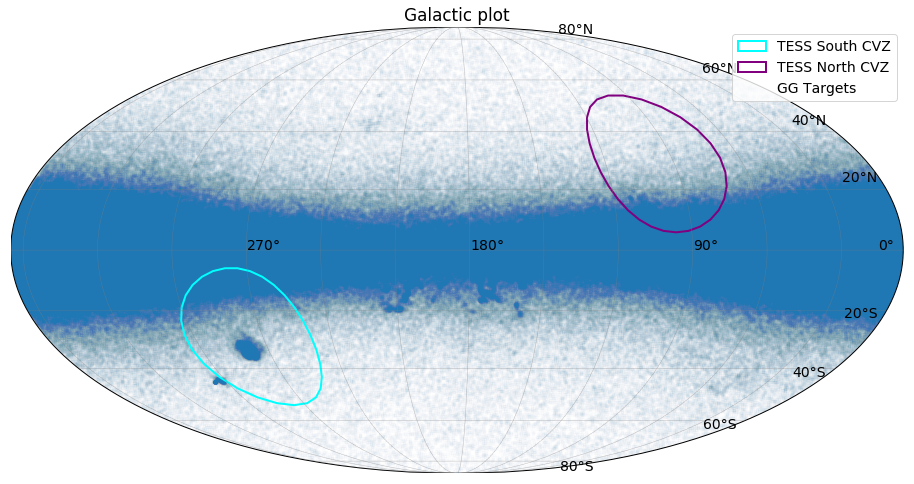

In [4]:
plt.rcParams.update({'font.size': 14})
(fig,bmap) = testfield_gal()
gg_coord_fk5 = SkyCoord(gg_tab['ra'],gg_tab['dec'],unit=(u.deg,u.deg),frame="fk5")
gg_coord_gal = gg_coord_fk5.transform_to(Galactic())
ggx,ggy = bmap(gg_coord_gal.l,gg_coord_gal.b)
bmap.scatter(ggx,ggy,marker='.',label='GG Targets',alpha=0.01)
plt.title("Galactic plot")
plt.legend()
plt.show()

## Creating Target Table

In [5]:
target_tab = Table()

In [6]:
#Combine GG and Dust targets
target_tab['ra'] = gg_tab['ra']
target_tab['dec'] = gg_tab['dec']
target_tab['cadence'] = np.repeat('mwm_galactic_1x1',len(gg_tab))
target_tab['type'] = np.repeat('mwm_galactic',len(gg_tab))
target_tab['priority'] = np.repeat(np.array(75,dtype='int32'),len(gg_tab))
target_tab['value'] = np.repeat(np.array(1.0,dtype='float32'),len(gg_tab))

In [7]:
target_tab

ra,dec,cadence,type,priority,value
float64,float64,str16,str12,int32,float32
256.34673,-89.862175,mwm_galactic_1x1,mwm_galactic,75,1.0
5.083719,-89.810509,mwm_galactic_1x1,mwm_galactic,75,1.0
127.47754599999999,-89.792671,mwm_galactic_1x1,mwm_galactic,75,1.0
294.04972000000004,-89.709785,mwm_galactic_1x1,mwm_galactic,75,1.0
119.85926699999999,-89.694496,mwm_galactic_1x1,mwm_galactic,75,1.0
254.016341,-89.673645,mwm_galactic_1x1,mwm_galactic,75,1.0
116.55820600000001,-89.66699200000001,mwm_galactic_1x1,mwm_galactic,75,1.0
289.81759,-89.66037800000001,mwm_galactic_1x1,mwm_galactic,75,1.0
316.423649,-89.650513,mwm_galactic_1x1,mwm_galactic,75,1.0


In [8]:
target_tab.write('mwm_galactic_target.fits',overwrite=True)

## Update Cadence Table

In [9]:
cadence_tab = Table()

In [10]:
cadence_tab['cadence'] = ['mwm_galactic_1x1']
cadence_tab['nepochs'] = np.array([1],dtype='int32')
cadence_tab['delta'] = np.array([[0.0]],dtype='float32')
cadence_tab['delta_min'] = np.array([[0.0]],dtype='float32')
cadence_tab['delta_max'] = np.array([[0.0]],dtype='float32')
cadence_tab['lunation'] = np.array([[1.0]],dtype='float32')
cadence_tab['instrument'] = np.array([['apogee']],dtype='str')

In [11]:
cadence_tab

cadence,nepochs,delta [1],delta_min [1],delta_max [1],lunation [1],instrument [1]
str16,int32,float32,float32,float32,float32,str6
mwm_galactic_1x1,1,0.0,0.0,0.0,1.0,apogee


In [12]:
cadence_tab.write('mwm_galactic_cadence.fits',overwrite=True)